## 一、逻辑回归

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn.metrics import classification_report

### 1.1 读取数据

In [48]:
data = pd.read_csv('ex2data1.txt', names = ['exam1', 'exam2', 'admitted'])

# 查看前 5 行
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [49]:
# 输出数据的平均值，标准差等信息
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


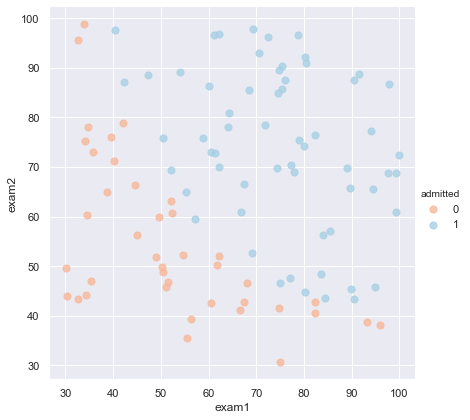

In [50]:
# 设置表格主题，调色板等
sns.set(context = 'notebook', style = 'darkgrid', palette = sns.color_palette("RdBu", 2), color_codes = False)

# scatter_kws 控制数据点的显示大小
sns.lmplot('exam1', 'exam2', hue = 'admitted', data = data, 
            size = 6, fit_reg = False, scatter_kws = {"s": 50})

plt.show()

In [51]:
# 读取数据特征
def get_X(df):
    # 创建 m 行 1 列的数据帧
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    # 合并全 1 向量作为元素数据第一列，axis = 0 按行合并，anix = 1 按列合并
    data = pd.concat([ones, df], axis=1)
    return data.iloc[:, :-1].values

In [52]:
# 读取数据值，即数据标签
def get_y(df):
    # 返回原始数据最后一列组成的数组，df.iloc[:, -1] 指最后一列
    return np.array(df.iloc[:, -1])

In [53]:
X = get_X(data)
print(X.shape)

y = get_y(data)
print(y.shape)

(100, 3)
(100,)


### 1.2 Sigmoid 假设函数

In [54]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

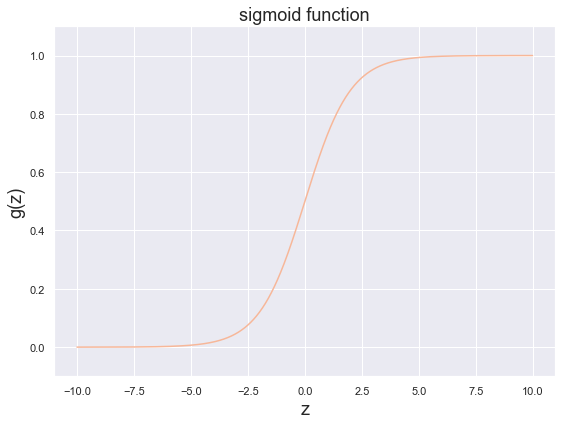

In [55]:
# 绘制 sigmoid 函数曲线
fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(np.arange(-10, 10, step = 0.01), 
        sigmoid(np.arange(-10, 10, step = 0.01)))

ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('z', fontsize = 18)
ax.set_ylabel('g(z)', fontsize = 18)
ax.set_title('sigmoid function', fontsize = 18)

plt.show()

## 1.3 代价函数

In [56]:
theta = np.zeros(3)
theta

array([0., 0., 0.])

In [57]:
# 逻辑回归代价函数
def cost_function(theta, X, y):
    # 向量化代码
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))

In [58]:
cost_function(theta, X, y)

0.6931471805599453

## 1.4 梯度下降

In [61]:
# 梯度计算
# return 梯度的一维数组
def gradient(theta, X, y):
    # 向量化计算公式：(1 / m) * X.T @ (sigmoid(X @ theta) - y)
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)

In [62]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

## 1.5 训练参数

In [63]:
import scipy.optimize as opt

In [64]:
# 用 opt.minimize 来训练逻辑回归的参数
# Newton-CG 是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数
res = opt.minimize(fun = cost_function, x0 = theta, args = (X, y), method = 'Newton-CG', jac = gradient)

In [65]:
print(res)

     fun: 0.20349771447597362
     jac: array([9.71219458e-06, 6.96602898e-04, 8.53722702e-04])
 message: 'Optimization terminated successfully.'
    nfev: 73
    nhev: 0
     nit: 29
    njev: 253
  status: 0
 success: True
       x: array([-25.17064404,   0.20630619,   0.20154693])


## 1.6 用训练集预测和验证

In [66]:
# 验证函数
# X: 待验证的特征矩阵
# theta: 已经训练好的逻辑回归参数
def predict(X, theta):
    prob = sigmoid(X @ theta)
    return (prob >= 0.5).astype(int)

In [67]:
final_theta = res.x

# 计算 y 在训练集上的预测值
y_predict = predict(X, final_theta)

# 打印分类报告
print(classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



## 1.7 寻找决策边界

In [74]:
# final theta
print(res.x)

[-25.17064404   0.20630619   0.20154693]


In [89]:
# y = theta_0 + theta_1 * x1 + theta_2 * x2
# 消除 theta_2，用 theta_0 和 theta_1 构造决策边界
# 加上负号是为了保证效率小于 0，如果斜率大于 0，显然不能拟合数据集
coef = -(res.x / res.x[2])
print(coef)

[124.88725955  -1.02361365  -1.        ]


In [90]:
x = np.arange(130, step = 0.1)
# 决策边界函数方程
y = coef[0] + coef[1] * x

In [91]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


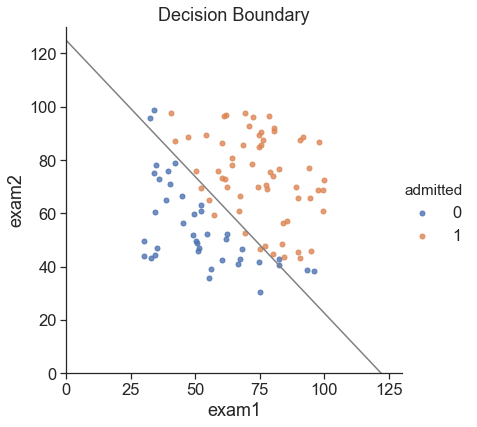

In [92]:
sns.set(context = "notebook", style = "ticks", font_scale = 1.5)

sns.lmplot('exam1', 'exam2', hue = 'admitted', data = data, 
           size = 6, 
           fit_reg = False, 
           scatter_kws = {"s": 25}
          )

# 绘制决策边界
plt.plot(x, y, 'grey')

plt.xlim(0, 130)
plt.ylim(0, 130)

plt.title('Decision Boundary')

plt.show()